In [24]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [25]:
def plot_result(img_path, img_name, save_path='', channel_mode=0):
    ''' plot_result
    :param: img_path: input image
    :param: img_name: name of input image
    :param: save_path: path saving the results
    :param channel_mode: 0 - flatten / 1 - rgb / 2 - HSV, defaults to 0
    :return: None
    '''
    img = cv2.imread(img_path)

    plt.figure(figsize=(10, 5), dpi=300) 

    # Plot histogram&cdf of the image
    if channel_mode == 0:

        # Histogram
        hist, bins = np.histogram(img.flatten(), 256, [0, 256])

        # Plot histogram
        plt.hist(img.flatten(), 256, [0, 256], label = 'histogram', color='r')
        plt.legend(loc='best')
        plt.xlim([0,256])

        # Cdf
        pdf = hist/np.sum(hist)
        cdf = pdf.cumsum()
        # Normalize cdf
        cdf = cdf * float(hist.max()) / cdf.max() 

        # Plot cdf
        plt.plot(cdf, label = 'cdf', color = 'b')
        plt.xlim([0,256])

    # Plot histogram&cdf with RGB channels separately
    if channel_mode ==1 :

        _, _, colorChannel = img.shape
        colors = ['B', 'G', 'R']

        for i in range(colorChannel):
            # Histogram
            hist, bins = np.histogram(img[:, :, i].flatten(), 256, [0, 256])

            # Plot histogram
            plt.hist(img[:, :, i].flatten(), 256, [0, 256], label = colors[i] + '_histogram')
            plt.legend(loc='best')
            plt.xlim([0,256])

        
        for i in range(colorChannel):
            # Cdf
            hist, bins = np.histogram(img[:, :, i].flatten(), 256, [0, 256])
            cdf = np.cumsum(hist/np.sum(hist))
            # Normalize cdf
            cdf = cdf * float(hist.max()) / cdf.max() 

            # Plot cdf
            plt.plot(cdf, label = colors[i] + '_cdf')
            plt.xlim([0,256])

    # Plot histogram&cdf with HSV input format
    if channel_mode == 2:

        # Convert BGR to HSV format
        img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
        H, S, V = cv2.split(img_hsv)

        # Plot Hist
        hist_S, _ = np.histogram(S.flatten(), 256, [0, 256])
        hist_V, _ = np.histogram(V.flatten(), 256, [0, 256])
        plt.hist(S.flatten(), 256, [0, 256], label = 'S_histogram')
        plt.legend(loc='best')
        plt.xlim([0,256])
        plt.hist(V.flatten(), 256, [0, 256], label = 'V_histogram')
        plt.legend(loc='best')
        plt.xlim([0,256])

        # Cdf
        cdf_S = np.cumsum(hist_S/np.sum(hist_S))
        cdf_S = cdf_S * float(hist_S.max() / cdf_S.max())
        cdf_V = np.cumsum(hist_V/np.sum(hist_V))
        cdf_V = cdf_V * float(hist_V.max() / cdf_V.max())

        # Plot Cdf
        plt.plot(cdf_S, label = "S_cdf")
        plt.xlim([0, 256])
        plt.plot(cdf_V, label = "V_cdf")
        plt.xlim([0, 256])

    
    plt.title(img_name)
    plt.legend(loc='best')
    if not save_path=='':
        plt.savefig(save_path)
    plt.show()


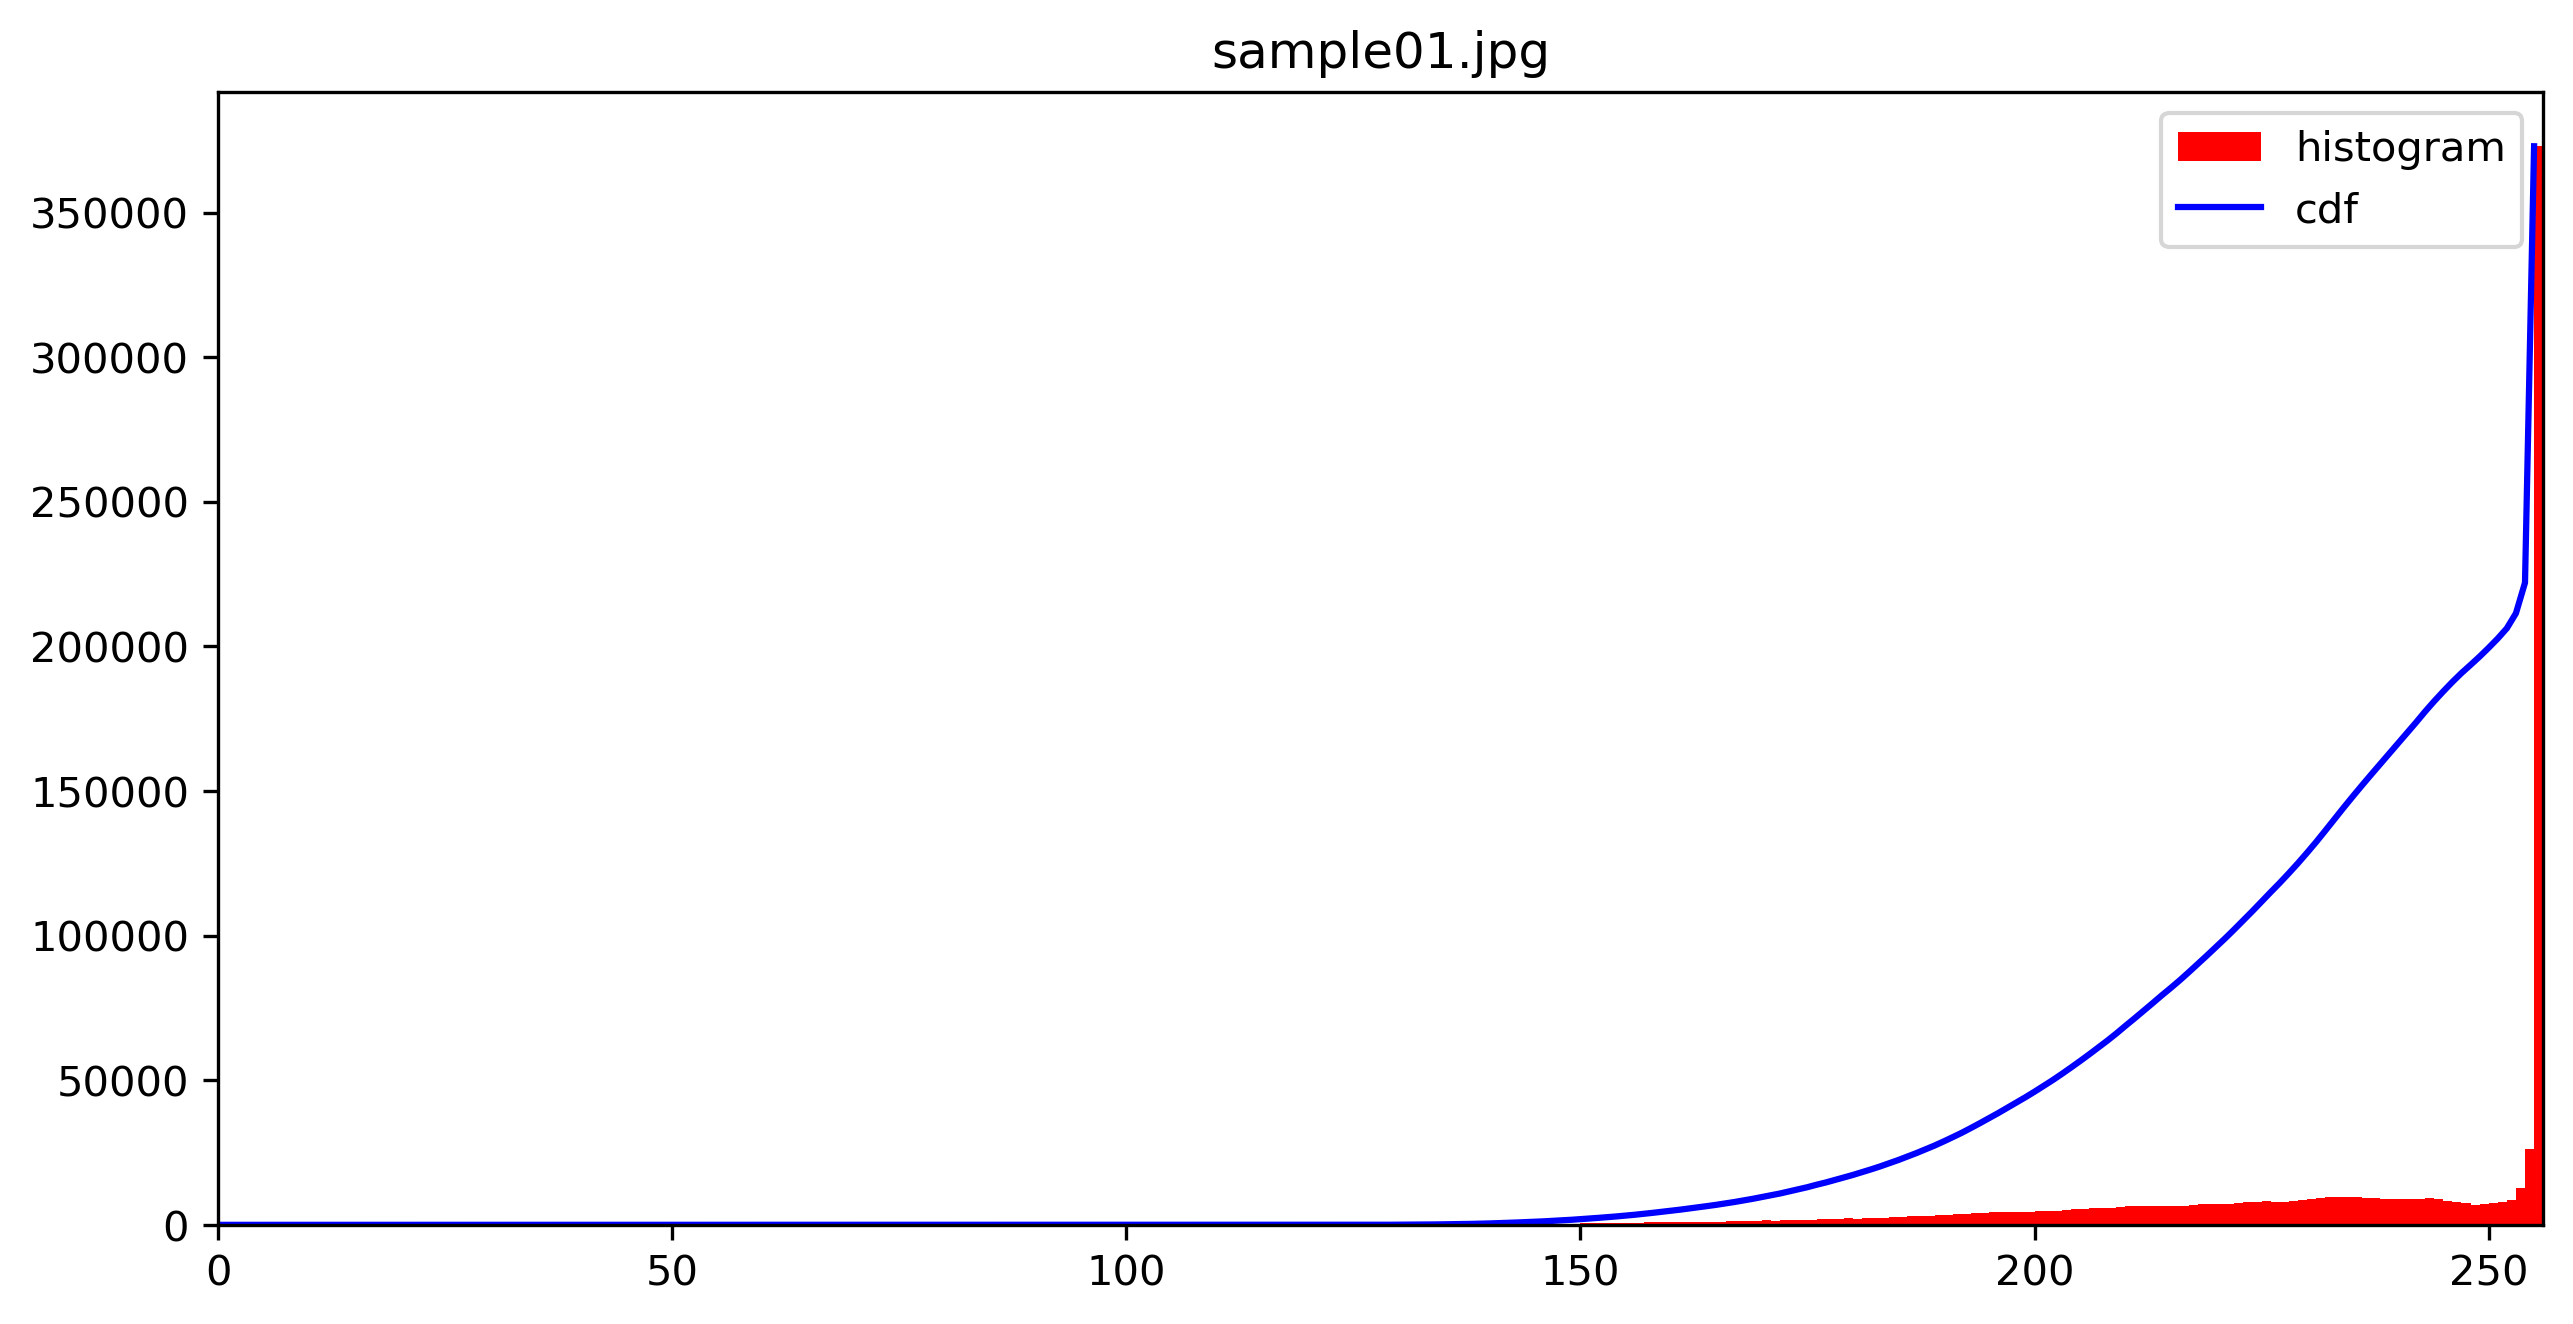

TypeError: plot_result() got an unexpected keyword argument 'rchannel_mode'

In [26]:
base_path1 = 'sample_images/'
base_path2 = 'HE_images/'
save_path = 'HE_hist&cdf/'
imgList = ["sample01.jpg", "sample02.jpeg", "sample03.jpeg", "sample04.jpeg", "sample05.jpeg", "sample06.jpg", "sample07.jpg", "sample08.jpg"]
for imgPath in imgList:
    plot_result(base_path1 + imgPath, imgPath, save_path = save_path + imgPath, channel_mode = 0)
    plot_result(base_path2 + 'RGB_' + imgPath, 'RGB_' + imgPath, save_path = save_path + 'RGB_' + imgPath, channel_mode = 1)
    plot_result(base_path2 + 'HSV_' + imgPath, 'HSV_' + imgPath, save_path = save_path + 'HSV_' + imgPath, channel_mode = 2)